<a href="https://colab.research.google.com/github/neerajkumarvaid/ML_DL_RL_Codes/blob/master/Machine_Learning/Murphy/MLE_for_Bernoulli_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Maximum Likelood Estimation (MLE) for Bernoulli Distribution

In [5]:
%matplotlib inline
from __future__ import division

import numpy as np
import pandas as pd
import statsmodels.api as sm
import sympy as sp
#import pymc
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from scipy.special import gamma

from sympy.interactive import printing
printing.init_printing()

In [3]:
# Simulate data
np.random.seed(123) #random seed to ensure reproducibility of results

N = 100 # number of observations
theta = 0.3 # actual parameter (probability of Y = 1)
Y = np.random.binomial(1, theta, N) # generate N output samples

In [14]:
Y

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0])

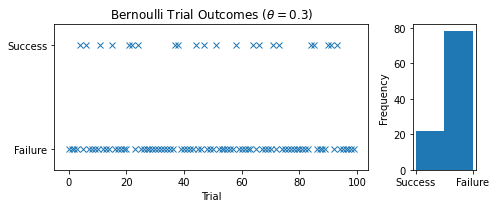

In [10]:
# Plot the data
fig = plt.figure(figsize=(7,3)) #figure size
gs = gridspec.GridSpec(1, 2, width_ratios=[5, 1]) 
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

ax1.plot(range(N), Y, 'x')
ax2.hist(-Y, bins=2)

ax1.yaxis.set(ticks=(0,1), ticklabels=('Failure', 'Success'))
ax2.xaxis.set(ticks=(-1,0), ticklabels=('Success', 'Failure'));

ax1.set(title=r'Bernoulli Trial Outcomes $(\theta=0.3)$', xlabel='Trial', ylim=(-0.2, 1.2))
ax2.set(ylabel='Frequency')

fig.tight_layout()

MLE for $\theta$ can be written as:

$\hat{\theta}_{MLE} = \frac{N_{1}}{N_{0} + N_{1}}$

In [13]:
# Find the optimal theta_hat using the analytic solution
theta_hat_mle = Y.sum() / N #implementation of above equation
var_analytic = (theta_hat_analytic * (1 - theta_hat_analytic)) / N #once we have theta, we can estimate the variance of the Bernoulli trial
print('MLE Results: %.2f (%.10f)' % (theta_hat_analytic, var_analytic**0.5))

MLE Results: 0.22 (0.0414246304)


In [23]:
# How MLE varies with the number of observations?
N_values = [5, 10, 50, 100, 1000, 10000]
theta = 0.3 # actual parameter (probability of Y = 1)

theta_estimates = []

for N in N_values:
  Y = np.random.binomial(1, theta, N) # generate ground truth
  theta_hat_mle = Y.sum() / N # MLE of theta
  theta_estimates.append(theta_hat_mle)



In [24]:
theta_estimates

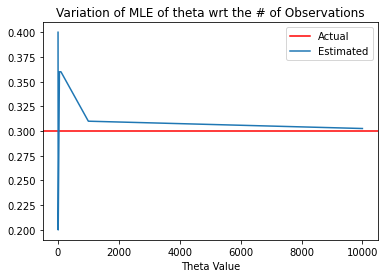

In [36]:
plt.axhline(y=theta, color='r', linestyle='-')
plt.plot(N_values ,theta_estimates)
plt.title("Variation of MLE of theta wrt the # of Observations")
plt.xlabel("# of Observations")
plt.xlabel("Theta Value")
plt.legend(['Actual', 'Estimated'])
plt.show()